In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

set_config(transform_output="pandas")

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


> Supongamos que queremos predecir la posibilidad que un pasajero sobreviva o muera luego del accidente del Titanic.

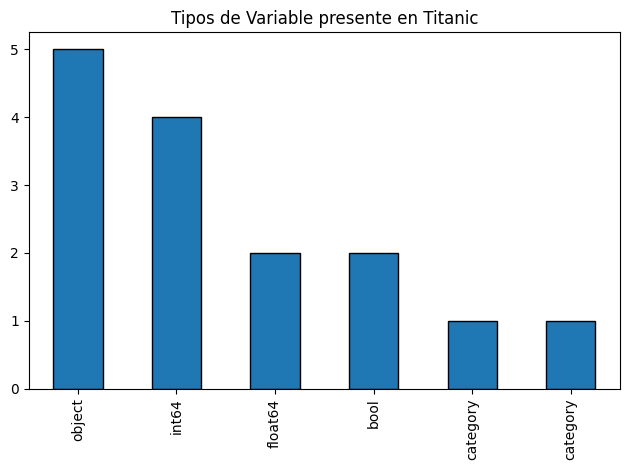

In [2]:
df.dtypes.value_counts().plot(
    kind="bar",
    edgecolor="k",
    title="Tipos de Variable presente en Titanic",
)
plt.tight_layout()

## Supongamos que utilizaremos las siguientes variables

In [3]:
X = df[["class", "sex", "embark_town", "fare", "age"]]
y = df.alive

X.shape, y.shape

((891, 5), (891,))

## EDA

In [4]:
num_cols = X.select_dtypes(np.number).columns.tolist()
cat_cols = [col for col in X.columns if col not in num_cols]
print(f"Variables Numéricas: {num_cols}")
print(f"Variables Categóricas: {cat_cols}")

Variables Numéricas: ['fare', 'age']
Variables Categóricas: ['class', 'sex', 'embark_town']


#### Valores Faltantes (Nulos)

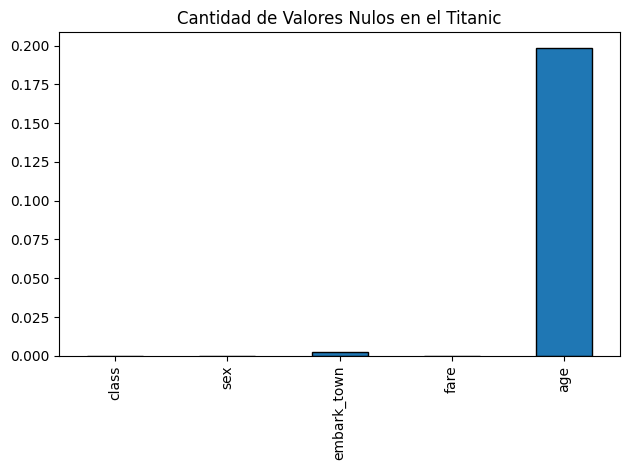

In [5]:
X.isnull().mean().plot(
    kind="bar",
    edgecolor="k",
    title="Cantidad de Valores Nulos en el Titanic",
)
plt.tight_layout()

## Variables Numéricas

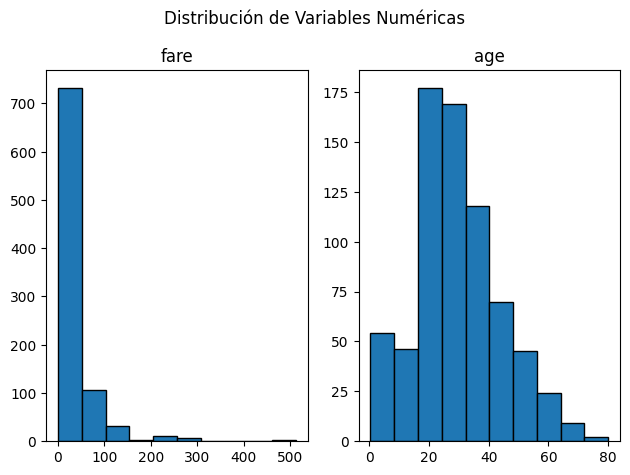

In [6]:
X.hist(grid=False, edgecolor="k")
plt.suptitle("Distribución de Variables Numéricas")
plt.tight_layout()

## Variables Categóricas

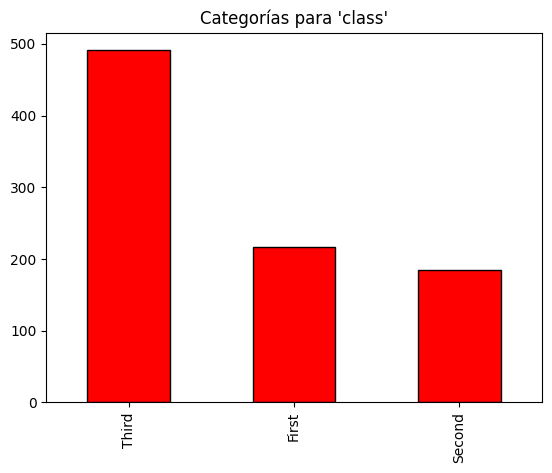

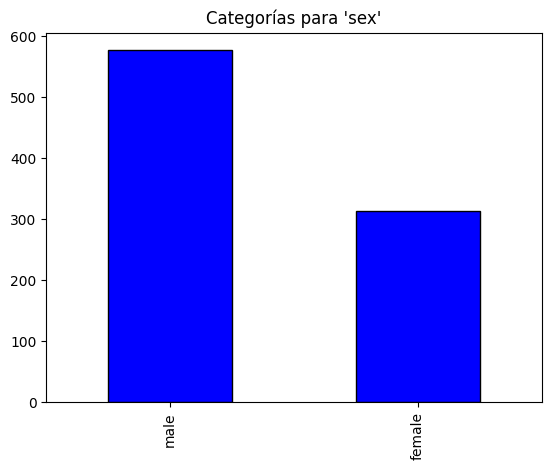

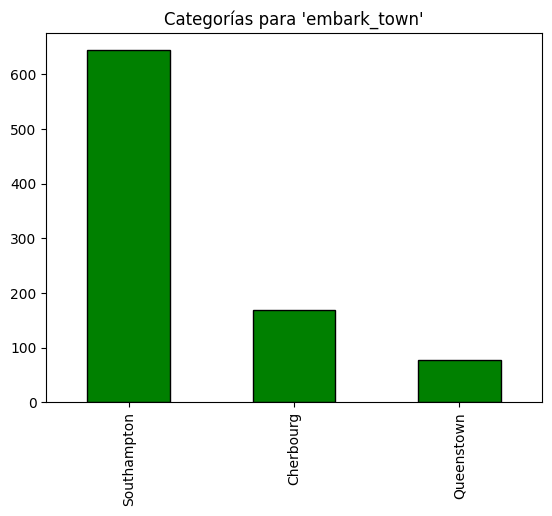

In [7]:
color = ["red", "blue", "green"]
for cat, color in zip(cat_cols, color):
    df[cat].value_counts().plot(
        kind="bar",
        edgecolor="k",
        color=color,
        title=f"Categorías para '{cat}'",
    )
    plt.show()

## Preprocesamiento

In [8]:
from feature_engine.imputation import CategoricalImputer

ci = CategoricalImputer(imputation_method="frequent")
X_imp = ci.fit_transform(X)
X_imp

,class,sex,embark_town,fare,age
0,Third,male,Southampton,7.2500,22.0
1,First,female,Cherbourg,71.2833,38.0
2,Third,female,Southampton,7.9250,26.0
3,First,female,Southampton,53.1000,35.0
4,Third,male,Southampton,8.0500,35.0
...,...,...,...,...,...
886,Second,male,Southampton,13.0000,27.0
887,First,female,Southampton,30.0000,19.0
888,Third,female,Southampton,23.4500,NaN
889,First,male,Cherbourg,30.0000,26.0


In [9]:
from feature_engine.imputation import MeanMedianImputer

mmi = MeanMedianImputer(imputation_method="mean")
X_imp = mmi.fit_transform(X_imp)
X_imp

,class,sex,embark_town,fare,age
0,Third,male,Southampton,7.2500,22.000000
1,First,female,Cherbourg,71.2833,38.000000
2,Third,female,Southampton,7.9250,26.000000
3,First,female,Southampton,53.1000,35.000000
4,Third,male,Southampton,8.0500,35.000000
...,...,...,...,...,...
886,Second,male,Southampton,13.0000,27.000000
887,First,female,Southampton,30.0000,19.000000
888,Third,female,Southampton,23.4500,29.699118
889,First,male,Cherbourg,30.0000,26.000000


In [10]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder()
X_ohe = ohe.fit_transform(X_imp)
X_ohe

,fare,age,class_Third,class_First,class_Second,sex_male,sex_female,embark_town_Southampton,embark_town_Cherbourg,embark_town_Queenstown
0,7.2500,22.000000,1,0,0,1,0,1,0,0
1,71.2833,38.000000,0,1,0,0,1,0,1,0
2,7.9250,26.000000,1,0,0,0,1,1,0,0
3,53.1000,35.000000,0,1,0,0,1,1,0,0
4,8.0500,35.000000,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,13.0000,27.000000,0,0,1,1,0,1,0,0
887,30.0000,19.000000,0,1,0,0,1,1,0,0
888,23.4500,29.699118,1,0,0,0,1,1,0,0
889,30.0000,26.000000,0,1,0,1,0,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler

sc_all = StandardScaler()
X_sc_all = sc_all.fit_transform(X_ohe)
X_sc_all

,fare,age,class_Third,class_First,class_Second,sex_male,sex_female,embark_town_Southampton,embark_town_Cherbourg,embark_town_Queenstown
0,-0.502445,-0.592481,0.902587,-0.565685,-0.510152,0.737695,-0.737695,0.615838,-0.482043,-0.307562
1,0.786845,0.638789,-1.107926,1.767767,-0.510152,-1.355574,1.355574,-1.623803,2.074505,-0.307562
2,-0.488854,-0.284663,0.902587,-0.565685,-0.510152,-1.355574,1.355574,0.615838,-0.482043,-0.307562
3,0.420730,0.407926,-1.107926,1.767767,-0.510152,-1.355574,1.355574,0.615838,-0.482043,-0.307562
4,-0.486337,0.407926,0.902587,-0.565685,-0.510152,0.737695,-0.737695,0.615838,-0.482043,-0.307562
...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,-0.207709,-1.107926,-0.565685,1.960202,0.737695,-0.737695,0.615838,-0.482043,-0.307562
887,-0.044381,-0.823344,-1.107926,1.767767,-0.510152,-1.355574,1.355574,0.615838,-0.482043,-0.307562
888,-0.176263,0.000000,0.902587,-0.565685,-0.510152,-1.355574,1.355574,0.615838,-0.482043,-0.307562
889,-0.044381,-0.284663,-1.107926,1.767767,-0.510152,0.737695,-0.737695,-1.623803,2.074505,-0.307562


In [12]:
from feature_engine.wrappers import SklearnTransformerWrapper

sc = SklearnTransformerWrapper(StandardScaler(), variables=["fare", "age"])
X_sc = sc.fit_transform(X_ohe)
X_sc

,fare,age,class_Third,class_First,class_Second,sex_male,sex_female,embark_town_Southampton,embark_town_Cherbourg,embark_town_Queenstown
0,-0.502445,-0.592481,1,0,0,1,0,1,0,0
1,0.786845,0.638789,0,1,0,0,1,0,1,0
2,-0.488854,-0.284663,1,0,0,0,1,1,0,0
3,0.420730,0.407926,0,1,0,0,1,1,0,0
4,-0.486337,0.407926,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,-0.207709,0,0,1,1,0,1,0,0
887,-0.044381,-0.823344,0,1,0,0,1,1,0,0
888,-0.176263,0.000000,1,0,0,0,1,1,0,0
889,-0.044381,-0.284663,0,1,0,1,0,0,1,0


## Entrenamiento del Modelo

In [13]:
from sklearn.neighbors import KNeighborsClassifier


def knn_clf(X, y, k=5, prep=""):
    knn = KNeighborsClassifier(
        n_neighbors=k, metric="euclidean", n_jobs=-1
    )
    ## Notar que es posible utilizar Variables categóricas como Etiquetas...
    knn.fit(X, y)
    y_pred = knn.predict(X)
    print(
        f"Score k = {k}, y Preprocesamiento: {prep}: {knn.score(X,y):.4f}"
    )
    return y_pred


for k in [3, 5, 7, 9, 11, 13, 15]:
    print(
        "================================================================="
    )
    y_pred_sc = knn_clf(X_sc, y, k=k, prep="StandardScaler Numérico")
    y_pred_sc_all = knn_clf(X_sc_all, y, k=k, prep="StandardScaler a todo")
    y_pred_ohe = knn_clf(X_ohe, y, k=k, prep="Sin Escalar")

Score k = 3, y Preprocesamiento: StandardScaler Numérico: 0.8844
Score k = 3, y Preprocesamiento: StandardScaler a todo: 0.8855
Score k = 3, y Preprocesamiento: Sin Escalar: 0.8384
Score k = 5, y Preprocesamiento: StandardScaler Numérico: 0.8698
Score k = 5, y Preprocesamiento: StandardScaler a todo: 0.8698
Score k = 5, y Preprocesamiento: Sin Escalar: 0.8204
Score k = 7, y Preprocesamiento: StandardScaler Numérico: 0.8608
Score k = 7, y Preprocesamiento: StandardScaler a todo: 0.8575
Score k = 7, y Preprocesamiento: Sin Escalar: 0.7834
Score k = 9, y Preprocesamiento: StandardScaler Numérico: 0.8418
Score k = 9, y Preprocesamiento: StandardScaler a todo: 0.8406
Score k = 9, y Preprocesamiento: Sin Escalar: 0.7733
Score k = 11, y Preprocesamiento: StandardScaler Numérico: 0.8373
Score k = 11, y Preprocesamiento: StandardScaler a todo: 0.8361
Score k = 11, y Preprocesamiento: Sin Escalar: 0.7643
Score k = 13, y Preprocesamiento: StandardScaler Numérico: 0.8272
Score k = 13, y Preprocesa

> Conclusión: Los Preprocesamientos afectan de manera importante el entrenamiento de un modelo. 

## Uso de Pipelines

In [14]:
from sklearn.pipeline import Pipeline


def model_pipeline(num_method, cat_method, sc_variables, k=5):

    sc = SklearnTransformerWrapper(
        StandardScaler(), variables=sc_variables
    )

    pipe = Pipeline(
        steps=[
            ("num_imp", MeanMedianImputer(imputation_method=num_method)),
            ("cat_imp", CategoricalImputer(imputation_method=cat_method)),
            ("ohe", OneHotEncoder()),
            # ("sc", StandardScaler()),
            ("sc", sc),
            ("model", KNeighborsClassifier(n_neighbors=k, n_jobs=-1)),
        ]
    )

    return pipe


pipe = model_pipeline(
    num_method="mean", cat_method="frequent", sc_variables=["age", "fare"]
)
pipe

Pipeline(steps=[('num_imp', MeanMedianImputer(imputation_method='mean')),
                ('cat_imp', CategoricalImputer(imputation_method='frequent')),
                ('ohe', OneHotEncoder()), ('sc', StandardScaler()),
                ('model', KNeighborsClassifier(n_jobs=-1))])

In [15]:
pipe.fit(X, y)
y_pred = pipe.predict(X)
pipe.score(X, y)

0.8698092031425365

In [16]:
y_pred

array(['no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
